In [1]:
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [2]:
data = web.DataReader('AAPL','yahoo')

In [4]:
data['SMA_100'] = ta.SMA(data['Close'], 100)

In [3]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-28,37.557499,37.297501,37.472500,37.375000,68854800.0,35.381638
2017-07-31,37.582500,37.032501,37.474998,37.182499,79383600.0,35.199417
2017-08-01,37.555000,37.102501,37.275002,37.512501,141474400.0,35.511806
2017-08-02,39.937500,39.040001,39.820000,39.285000,279747200.0,37.189781
2017-08-03,39.302502,38.755001,39.262501,38.892502,108389200.0,36.818211
...,...,...,...,...,...,...
2022-07-21,155.570007,151.940002,154.500000,155.350006,65086600.0,155.350006
2022-07-22,156.279999,153.410004,155.389999,154.089996,66625400.0,154.089996
2022-07-25,155.039993,152.279999,154.009995,152.949997,53623900.0,152.949997


### Simple moving average

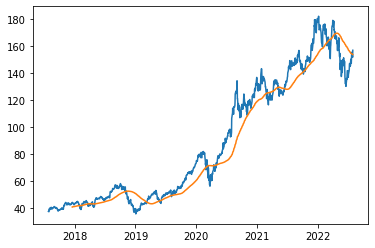

In [9]:
plt.plot(data['Close'])
plt.plot(data['SMA_100'])

### Exponential moving average

In [10]:
data['EMA_100'] = ta.EMA(data['Close'], 100)

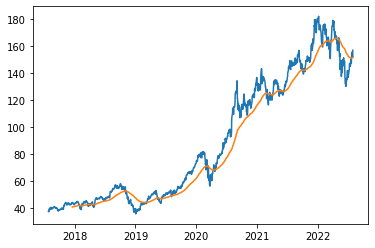

In [19]:
plt.plot(data['Close'])
plt.plot(data['EMA_100'])

### Relative strength index

In [12]:
data['RSI'] = ta.RSI(data['Close'])

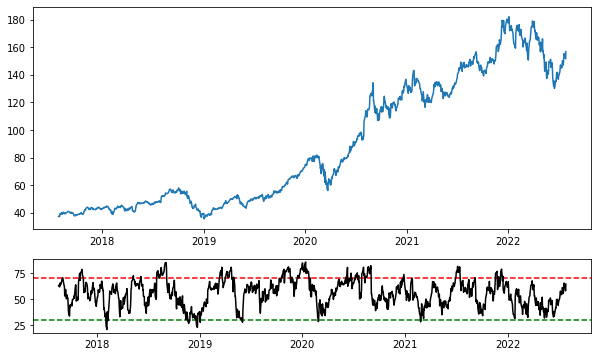

In [20]:
fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10,6))

axs[0].plot(data['Close'])
axs[1].axhline(y=70, color='r', linestyle='--')
axs[1].axhline(y=30, color='g', linestyle='--')
axs[1].plot(data['RSI'], color='black')

### Linear regression

In [21]:
data['LINEARREG'] = ta.LINEARREG(data['Close'], 200)

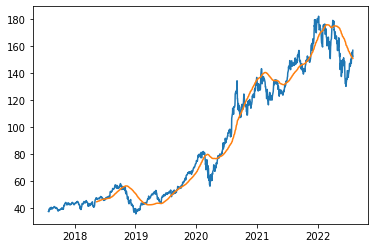

In [22]:
plt.plot(data['Close'])
plt.plot(data['LINEARREG'])

### Moving average convergence/divergence

<BarContainer object of 394 artists>

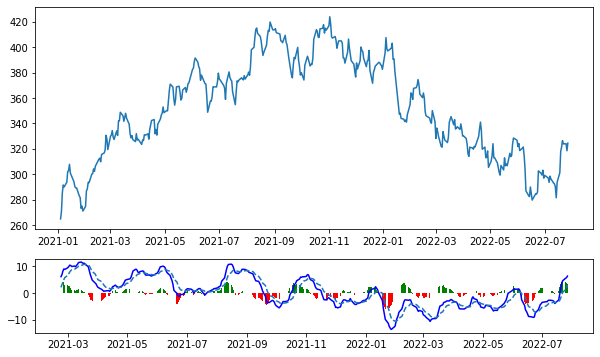

In [23]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

data = web.DataReader('GS', 'yahoo', start, end)
macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10,6))
c = ['red' if cl < 0 else 'green' for cl in macd_hist]

axs[0].plot(data['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, '--')
axs[1].bar(macd_hist.index, macd_hist, color=c)

In [24]:
ta.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [25]:
?ta.MACD

Docstring:
MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])

Moving Average Convergence/Divergence (Momentum Indicators)

Inputs:
    real: (any ndarray)
Parameters:
    fastperiod: 12
    slowperiod: 26
    signalperiod: 9
Outputs:
    macd
    macdsignal
    macdhist
Type:      function


In [26]:
?ta.CDLENGULFING

Docstring:
CDLENGULFING(open, high, low, close)

Engulfing Pattern (Pattern Recognition)

Inputs:
    prices: ['open', 'high', 'low', 'close']
Outputs:
    integer (values are -100, 0 or 100)
Type:      function


### Engulfing pattern

In [27]:
start = dt.datetime(2022, 3, 1)
end = dt.datetime.now()

data = web.DataReader('TSLA', 'yahoo', start, end)

In [28]:
data['ENGULFING'] = ta.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])

In [29]:
data

,High,Low,Open,Close,Volume,Adj Close,ENGULFING
Date,,,,,,,
2022-03-01,889.880005,853.780029,869.679993,864.369995,24922300,864.369995,0
2022-03-02,886.479980,844.270020,872.130005,879.890015,24881100,879.890015,0
2022-03-03,886.440002,832.599976,878.770020,839.289978,20541200,839.289978,0
2022-03-04,855.650024,825.159973,849.099976,838.289978,22333200,838.289978,0
2022-03-07,866.140015,804.570007,856.299988,804.580017,24164700,804.580017,0
...,...,...,...,...,...,...,...
2022-07-21,819.799988,764.599976,765.320007,815.119995,47344100,815.119995,0
2022-07-22,842.359985,812.140015,828.659973,816.729980,34421200,816.729980,0
2022-07-25,822.440002,802.200012,816.650024,805.299988,21357800,805.299988,0


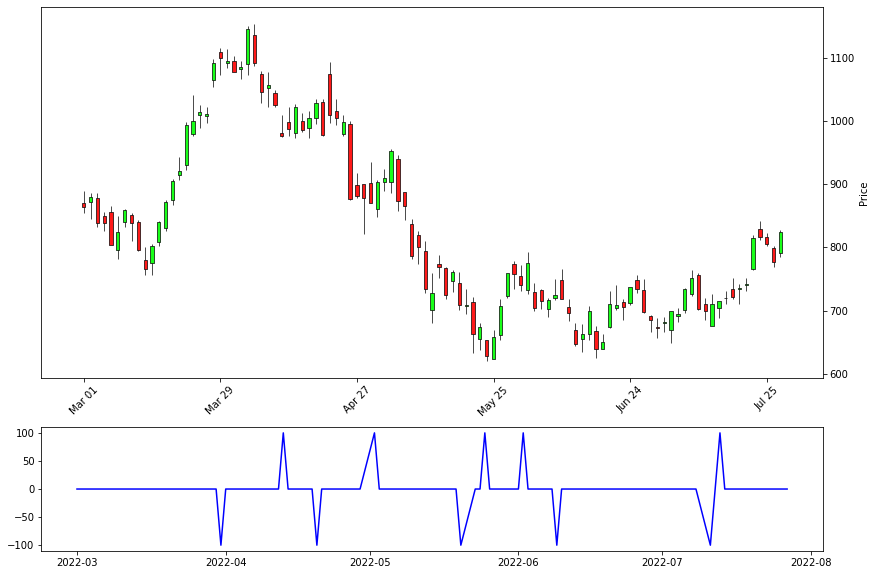

In [33]:
import mplfinance as mpf

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(14,10))

colors = mpf.make_marketcolors(up='#00ff00', down='#ff0000')
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=colors)

mpf.plot(data, type='candle', ax=axs[0], style=mpf_style)
axs[1].plot(data['ENGULFING'], color='blue')